*  This program examines 
*                  how the estimator of expected return 
*                                  is affected by different priors  

In [6]:
import pandas as pd                     # To load data, we use the package pandas
import numpy as np

# Load the monthly return of SP500 from 01/1934 to 12/2011

df = pd.read_excel('SP500.xlsx')  
Re = df.loc[:,"Return"]

T0 = len(df)             # Get the length, # of obvs (the headers of the Excel doesn't count)


T = 6                     # assumed sample size or months of data available    

R = Re[(T0-T):T0]          # get the most recent T months of data
                            # We assume these are our available observations
    
mu = np.mean(R)             #   compute the mean based on last T period data
V = np.var(R)               # compute the sample variance based on last T period data
s = np.sqrt(V)                  #  the standard deviation

print('(Monthly) Mean,   Std  \n')
print('        {0:.4f}   {1:.4f}\n '.format(mu, s))    

(Monthly) Mean,   Std  

        -0.0048   0.0580
 


In [7]:
#   Bayesian updating

mu0 = 0.12/12;              #  prior monthly mean is 1%
s0=0.01;                   #  prior monthly vol or standard deviation  

w=(s*s/T) / ( s0*s0 + s*s/T )     #  the weight on prior mean

bmu= w*mu0 + (1-w)*mu       #  The Bayesian mean 

print('  Sampe Mean,   Bayesian mean   \n')
print('        {0:.4f}   {1:.4f}\n '.format(mu, bmu))   

  Sampe Mean,   Bayesian mean   

        -0.0048   0.0078
 


In [6]:
# Q1:  Percentage of up returns?
     
Up = 0

for j in range(T): 
    if Re[j]>0:
        Up = Up+1

UpPer = Up/T

print('The percentage of up months \n')
print('          {0:.2f} \n'.format(UpPer)) 

The percentage of up months 

          0.62 



In [7]:
# Q2: What is the accumulative return if we miss 5% of the best returns ?
# Assuming earning the average riskfree rate of 4%/12 in those missing months                        
                        
ReturnS = sorted(Re)    # Sort the returns in increasing order

T1 = .05 * T             #  5% of the sample
T1 = round(T1)           # Round the number to an integer

Value1 = 1

for i in range(T-T1):
    Value1 = Value1 * (1 + ReturnS[i])

for i in range(T - T1 + 1, T):
    Value1 = Value1 * (1 + 0.04/12)

print('Q2: The accumulative return if we miss 5% of the best months? \n')
print('          {0:.2f}\n'.format(Value1))

Q2: The accumulative return if we miss 5% of the best months? 

          29.89



In [8]:
# Q3: What is the max drawdown, the largest % drop from a previous peak  
# Assuming earning the average riskfree rate of 4%/12 in those missing months                        
                        
# Since the algorithm (see the zip file) requires prices as input, we translate the
# returns into prices first (the starting price can be set as 100)
 
P = 100*np.ones((T,1))     # initial values

MDD = 0
Worst = 0
             # using the algorithm in the file
max = -99
Worst = np.amin(Re)         # the minimum of an array, the return here

Ptemp = 100                # need a temp to execute P[j+1]=P[j]*(1+Re[j]), so that
                             # P[j+1] is stored as P[j], to avoid index out of range in Python

for j in range(T): 
    Ptemp=Ptemp*(1+Re[j])        # convert to prices;
    P[j]=Ptemp   
    if P[j]>max:
        max=P[j]
    DD=100*(max-P[j]) / max
    if DD>MDD:
        MDD=DD
        
MDD = MDD / 100             # in percentage 
print(MDD)

[0.51259035]


In [9]:
# Simulate T normal random varables with the same mean and varance  

e = np.random.randn(T,1)     # Generate data from N(0,1), T by 1  

RN = np.ones((T,1))          # create the storage

for i in range(T):           # transform the data so that its mean and variance match the mkt
     RN[i]=mu + sigma*e[i]          # RN = mu*np.ones((T,1)) + sigma*e does the same, but 
                                    # month by month may be easier to understand
 


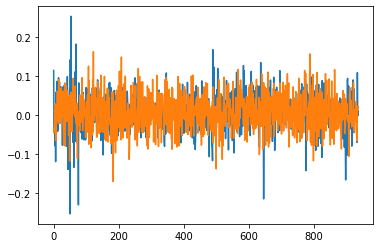

In [10]:
# plot the returns and simulated returns

p=plt.plot(Re)
p1 = plt.plot(RN)

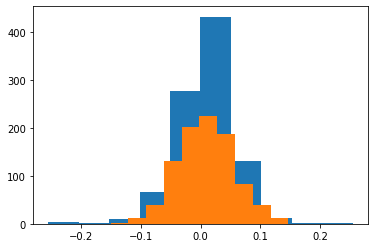

In [64]:
# plot the histogram of returns and simulated returns

p=plt.hist(Re)
p1 = plt.hist(RN)